## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np
import seaborn  as sns

**Result**: the LSTM is pretty bad when trained on individual financial time series, instead, we'll use the first 100 time series to predict 1, hence the model we'll include the correlations between the different time series.

## Import data

In [2]:
df = pd.read_csv('data/stock_details_5_years.csv')

df['Date'] = pd.to_datetime(df['Date'])
companies = df['Company'].unique().tolist()
dates = df['Date'].drop_duplicates().values

/var/folders/pg/mh4np6_d0qs9cxq5clx1wbbw0000gn/T/ipykernel_22671/2956375304.py:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


## Data Preprocessing

In [3]:
from tqdm import tqdm

data = []
features = 200

for company in tqdm(companies[:features]):
    company_data = df[df['Company'] == company]['High'].values
    company_data = (company_data[1:] - company_data[:-1]) / company_data[:-1]
    data.append(company_data)

# Time series must be same duration, else zero-pad first
data = np.array(data) # Shape : (features, timesteps)

100%|██████████| 200/200 [00:02<00:00, 70.38it/s]


Here, one feature corresponds to a time serie.

### Plotting things

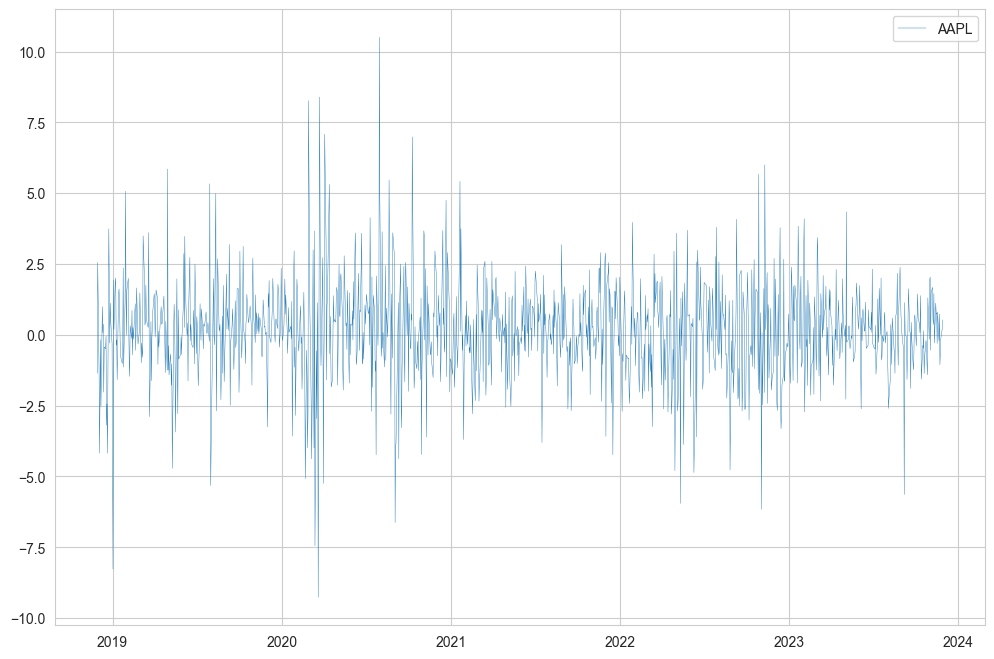

In [6]:
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
for k in range(1):
    plt.plot(dates[:-1], data[k]*100, label=companies[k], linewidth=0.3)
plt.legend()
plt.show()